# Lab Assignment 3

## Liu Rongxing, s1810054

We consider the system $$\frac{dx}{dt}=x(y-1),\quad \frac{dy}{dt}=4-y^2-x^2.$$

## Task 1 (2 marks)

Use `SymPy` to find the critical points of the system.

In [2]:
from sympy import *
import numpy as np
init_printing()
from IPython.display import display_latex

In [2]:
t,x,y=symbols('t,x,y')
fx= x*(y-1)
fy= 4-y**2-x**2
pretty_print(solve_poly_system([fx,fy],x,y))

[(0, -2), (0, 2), (-√3, 1), (√3, 1)]


## Task 2 (4 marks)

Give your implementation of the `linearise` function from Lab 3.

Use this to find linear approximations of the system around the critical points with $x \geq 0$ and $y \geq 0$. Use the output to classify these critical points (use markdown cells and proper reasoning to explain the type of each critical point).

There are two critical points with $x \geq 0$ and $y>0$, $(0,2)$ and $(\sqrt{3},1)$.

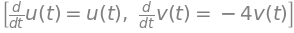

In [13]:
def lin_matrix(eqs,cp):
    u=Function('u')
    v=Function('v')
    Fxy = Matrix([eqs[0].rhs,eqs[1].rhs])
    J = Fxy.jacobian([x(t), y(t)])
    matJatCP=J.subs({x(t):cp[0], y(t):cp[1]})
    return matJatCP

def linearise(eqs,cp):
    u=Function('u')
    v=Function('v')
    Fxy = Matrix([eqs[0].rhs,eqs[1].rhs])
    J = Fxy.jacobian([x(t), y(t)])
    matJatCP=J.subs({x(t):cp[0], y(t):cp[1]})             
    e1=Eq(u(t).diff(t),matJatCP[0]*u(t)+matJatCP[1]*v(t))
    e2=Eq(v(t).diff(t),matJatCP[2]*u(t)+matJatCP[3]*v(t))
    return [e1,e2]

x = Function('x')
y = Function('y')
eq1 = Eq(x(t).diff(t),x(t)*(y(t)-1))
eq2 = Eq(y(t).diff(t),4-y(t)**2-x(t)**2)
linearise([eq1,eq2],[0,2])

In [14]:
m=lin_matrix([eq1,eq2],[0,2])
evals = list(m.eigenvals().keys())
evals

Since there are two real eigenvalues of the linear system, one positive and one negative, the critical point is an unstable saddle.

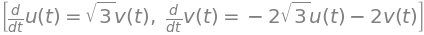

In [15]:
b=linearise([eq1,eq2],[sqrt(3),1])
b

In [17]:
m=lin_matrix([eq1,eq2],[sqrt(3),1])
evals = list(m.eigenvals().keys())
evals

Since the linear system has two complex eigenvalues with negative real part, the critical point is an asymptotically stable focus.

## Task 3 (4 marks)

Produce a phase portrait of the system, with trajectories showing the behaviour around all the critical points. A few trajectories are enough to show this behaviour. Use properly-sized arrows to diplay the vector field (the RHS of the ODE). There are some marks allocated to the quality of your figure in this part. Try to keep it illustrative yet not too cluttered.

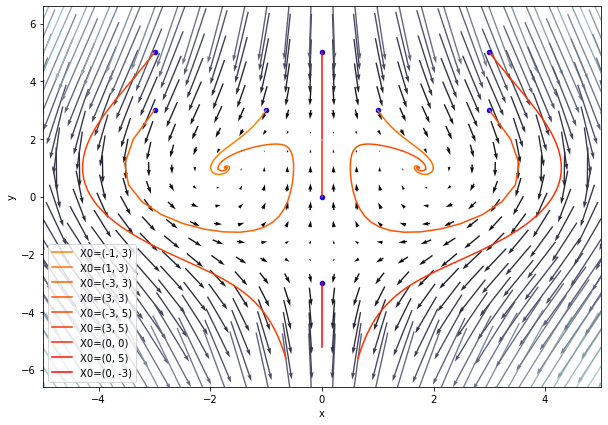

In [31]:
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t):
    u = np.multiply(x[0],(x[1]-1))
    v = -x[0]**2-x[1]**2+4
    return [u,v]
                    
# Plot vector field
X, Y = np.mgrid[-6:6:30j,-6:6:20j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.004, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[-1,3],[1,3],[-3,3],[3,3],[-3,5],[3,5],[0,0],[0,5],[0,-3]]
durations = [[0,4], [0,4], [0,8], [0,8],[0,0.8], [0,0.8], [0,1], [0,8],[0,0.2]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)
# note: you can replace ic_x, ic_y with *list(zip(*ics)) but this is a bit cryptic!

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,5)
plt.legend()

plt.show()